## Data extraction

#### Context

This analysis is a loan data provided by https://www.kaggle.com/zhijinzhai/loandata.

Base on the webiste:
This data set includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in collection. The financial product is a bullet loan that customers should pay off all of their loan debt in just one time by the end of the term, instead of an installment schedule. Of course, they could pay off earlier than their pay schedule.

___

#### Content

Loan_id - A unique loan number assigned to each loan customers

Loan_status - Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts

Principal - Basic principal loan amount at the origination

terms - Can be weekly (7 days), biweekly, and monthly payoff schedule

Effective_date - When the loan got originated and took effects

Due_date - Since it’s one-time payoff schedule, each loan has one single due date

Paidoff_time - The actual time a customer pays off the loan

Pastdue_days - How many days a loan has been past due

Age, education, gender A customer’s basic demographic information

___

**Describe what questions you intend to answer with the dataset**

I intend to answer the following questions:
* Do women tend to pay off their loans more reliably than men?
* Do women tend to take out larger or smaller loans than men?
* Do older people tend to pay off their loans more reliably?
* Do people have higher education tend to payy off their loans more reliably?
* What's the term of loan people usually choose?
* Do males or females tend to borrow more?
* Do higher education people borrow more? 
* Which age range borrows more? 
* Of the loans that people usually pay off, what are the terms of those loans?
* What is the maximum daily re-payment people manage to pay back?
___

**Import some libraries we ususly use when we are analyzing the dataset.**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')

___

**Loading data**

In [3]:
loandf = pd.read_csv('Loan_payments data.csv')

In [652]:
print(f'There are {loandf.shape[0]:d} datapoints with {loandf.shape[1]} dimensions.')

There are 500 datapoints with 11 dimensions.


In [653]:
loandf.head(5)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


## Data cleanup

**Treating/Detecting Outliers**

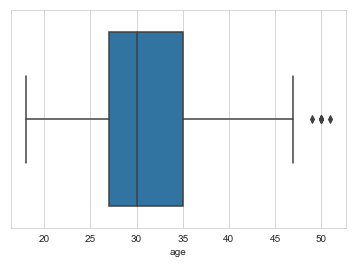

In [4]:
sns.boxplot(x="age", data = loandf)

In [657]:
outliers = loandf[loandf["age"] > 47].sort_values("age", ascending= False).index.tolist()

In [658]:
loandf.drop(outliers, inplace= True)

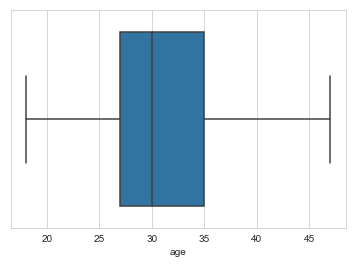

In [659]:
sns.boxplot(x="age", data = loandf)

No outliers after dropping the records which age is over 47

**Treating missing values**

In [558]:
loandf.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time      99
past_due_days     296
age                 0
education           0
Gender              0
dtype: int64

It looks like **paid_off_time** and **past_due_days** have missing values

In [10]:
loandf[loandf["past_due_days"].isnull()]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
5,xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,NaN,35,Master or Above,male
6,xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,NaN,29,college,male
7,xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,NaN,36,college,male
8,xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,NaN,28,college,male
9,xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,NaN,26,college,male


**past_due_days** shows some missing values. However, those values are not missing values. It represents a loan is not past due.

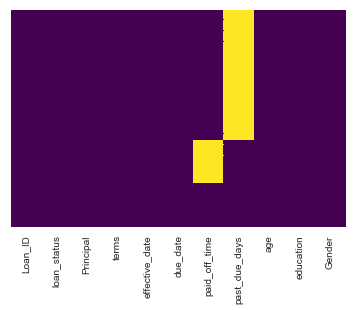

In [560]:
sns.heatmap(loandf.isnull(), yticklabels=False, cbar=False, cmap= "viridis")

In [561]:
loandf['past_due_days'].fillna(0, inplace=True)

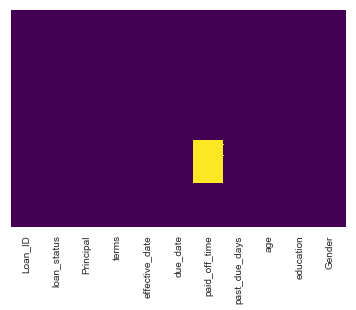

In [562]:
sns.heatmap(loandf.isnull(), yticklabels=False, cbar=False, cmap= "viridis")

In [563]:
loandf['paid_off_time'].fillna("havent paid", inplace=True)

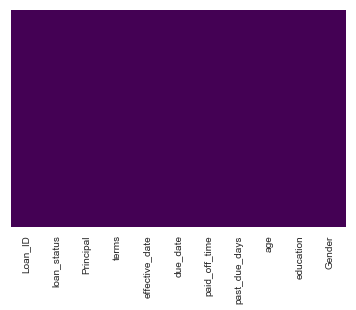

In [564]:
sns.heatmap(loandf.isnull(), yticklabels=False, cbar=False, cmap= "viridis")

All clean up

In [565]:
loandf.head(2)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0.0,45,High School or Below,male
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0.0,33,Bechalor,female


**Dummy variables**

In [566]:
Gender = pd.get_dummies(loandf["Gender"], drop_first=True)

In [567]:
education = pd.get_dummies(loandf["education"], drop_first=True)

**Make a copy which is used to make the model later**

In [568]:
loandf_copy = pd.concat([loandf, Gender ,education],axis=1)

In [569]:
loandf_copy.head(1)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,male,High School or Below,Master or Above,college
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0.0,45,High School or Below,male,1,1,0,0


In [570]:
loandf_copy['loan_status'] = loandf_copy['loan_status'].map({'PAIDOFF': 0, 'COLLECTION': 1, 'COLLECTION_PAIDOFF': 2})

Remove unrelevant columns 

In [571]:
loandf_copy.drop(["Loan_ID","Gender","education","effective_date","due_date","paid_off_time","past_due_days"],
                 axis=1, inplace= True)

In [572]:
loandf_copy.head(1)

,loan_status,Principal,terms,age,male,High School or Below,Master or Above,college
0,0,1000,30,45,1,1,0,0


## EDA

In [406]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           494 non-null object
loan_status       494 non-null object
Principal         494 non-null int64
terms             494 non-null int64
effective_date    494 non-null object
due_date          494 non-null object
paid_off_time     494 non-null object
past_due_days     494 non-null float64
age               494 non-null int64
education         494 non-null object
Gender            494 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 46.3+ KB


In [407]:
loandf.describe()

,Principal,terms,past_due_days,age
count,494.000000,494.000000,494.000000,494.000000
mean,943.319838,22.858300,14.427126,30.886640
std,115.466735,8.004573,25.589555,5.751383
min,300.000000,7.000000,0.000000,18.000000
25%,1000.000000,15.000000,0.000000,27.000000
50%,1000.000000,30.000000,0.000000,30.000000
75%,1000.000000,30.000000,12.000000,35.000000
max,1000.000000,30.000000,76.000000,47.000000


In [534]:
loandf.groupby('effective_date')["Loan_ID"].count().sort_values()

effective_date
9/8/2016       3
9/9/2016      15
9/13/2016     22
9/14/2016     33
9/10/2016     46
9/12/2016    146
9/11/2016    229
Name: Loan_ID, dtype: int64

This dataset contains the data from 9/8/2016 to 9/11/2016 

In [408]:
loandf.groupby("education").agg(["count","mean"])

Principal             terms            past_due_days  \
                         count        mean count       mean         count   
education                                                                   
Bechalor                    66  943.939394    66  21.333333            66   
High School or Below       206  951.456311   206  23.684466           206   
Master or Above              3  466.666667     3   9.666667             3   
college                    219  942.009132   219  22.721461           219   

                                  age             
                           mean count       mean  
education                                         
Bechalor              13.272727    66  31.863636  
High School or Below  16.456311   206  31.111650  
Master or Above        0.000000     3  37.000000  
college               13.063927   219  30.296804

In [409]:
loandf.groupby("Gender").agg(["count","mean"])

Principal             terms            past_due_days              age  \
           count        mean count       mean         count       mean count   
Gender                                                                         
female        75  944.000000    75  22.466667            75   9.813333    75   
male         419  943.198091   419  22.928401           419  15.252983   419   

                   
             mean  
Gender             
female  31.413333  
male    30.792363

In [410]:
loandf.groupby("loan_status").agg(["count","mean"])

Principal             terms            past_due_days  \
                       count        mean count       mean         count   
loan_status                                                               
COLLECTION                99  953.535354    99  23.939394            99   
COLLECTION_PAIDOFF        99  956.565657    99  23.858586            99   
PAIDOFF                  296  935.472973   296  22.162162           296   

                                age             
                         mean count       mean  
loan_status                                     
COLLECTION          62.747475    99  30.414141  
COLLECTION_PAIDOFF   9.242424    99  31.161616  
PAIDOFF              0.000000   296  30.952703

**Target variable**

In [411]:
loandf["loan_status"].value_counts()

PAIDOFF               296
COLLECTION             99
COLLECTION_PAIDOFF     99
Name: loan_status, dtype: int64

Add a new column in order to answer a question which is **What is the maximum/average daily re-payment people manage to pay back?**

In [412]:
loandf["Daily payment"] = loandf["Principal"] / loandf["terms"]

In [531]:
loandf.head(2)

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,Daily payment
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0.0,45,High School or Below,male,33.333333
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0.0,33,Bechalor,female,33.333333


## Data visualization / Descriptive analytics

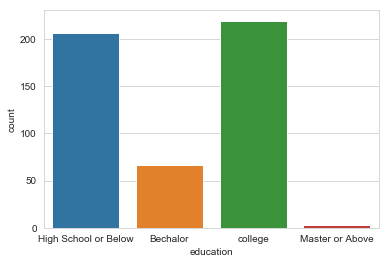

In [472]:
sns.countplot("education", data = loandf)

Notice in the above plot:
    
Those with a master’s degree or higher have less of a tendency to take out a loan than those with a lesser degree of education

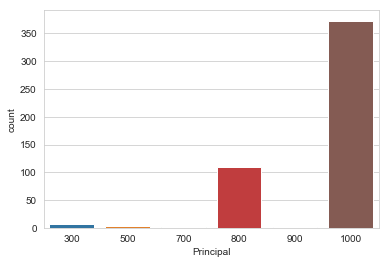

In [414]:
sns.countplot("Principal", data = loandf)

Notice in the above plot: 

Most people borrow loan for $1000.

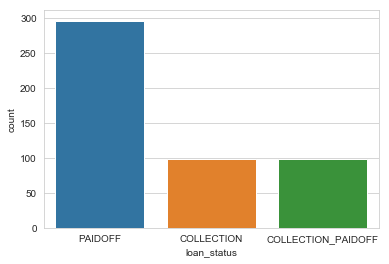

In [415]:
sns.countplot("loan_status", data = loandf)

Notice in the above plot: 

In this dataset, 3/5 of people paid off on time

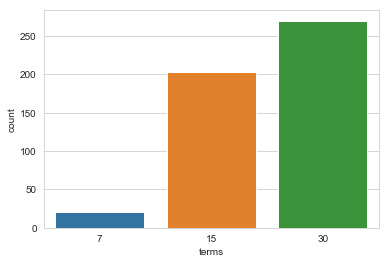

In [416]:
sns.countplot('terms', data = loandf)

Notice in the above plot: 

In this dataset of loan data, people choose monthly pay off schedule more than others.

Text(0.5,1,'Gender counts by Loan Status')

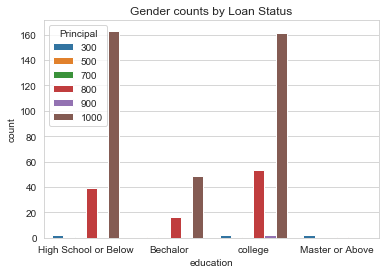

In [471]:
sns.countplot(x='education', hue='Principal', data=loandf)
plt.title('Gender counts by Loan Status')

In [468]:
print("Number of borrowers who have college degree:", sum(loandf["education"] == "college"))
print("Number of borrowers who have High School or Below:", sum(loandf["education"] == "High School or Below"))

Number of borrowers who have college degree: 219
Number of borrowers who have High School or Below: 206


Notice in the above plot: 

Those with a **Master’s degree** or higher have less of a tendency to take out a loan than those with a lesser degree of education

Text(0.5,1,'Gender counts by Loan Status')

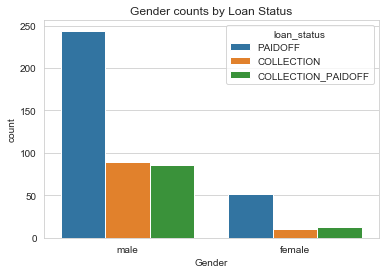

In [417]:
sns.countplot(x='Gender', hue='loan_status', data=loandf)
plt.title('Gender counts by Loan Status')

In [453]:
print("Number of men who pay off their loan: ", 
      loandf[(loandf['Gender'] == "male") & 
       (loandf["loan_status"] == "PAIDOFF")].count()[1])

print("Number of women who pay off their loan: ", 
      loandf[(loandf['Gender'] == "female") & 
       (loandf["loan_status"] == "PAIDOFF")].count()[1])

Number of men who pay off their loan:  244
Number of women who pay off their loan:  52


In [454]:
print("Number of men who borrower the loan:", sum(loandf['Gender'] == "male") )
print("Number of women who borrower the loan:", sum(loandf['Gender'] == "female") )

Number of men who borrower the loan: 419
Number of women who borrower the loan: 75


In [456]:
print("Percentage of men who pay off their loan:", 
      round(244/419,2))
print("Percentage of women who pay off their loan:",
      round(52/75,2))

Percentage of men who pay off their loan: 0.58
Percentage of women who pay off their loan: 0.69


Notice in the above plot: 

In this dataset of loan data, Men borrow more often than Women. Moreover, women pay off their loans more reliably than men

Text(0.5,1,'Principal counts by Loan Status')

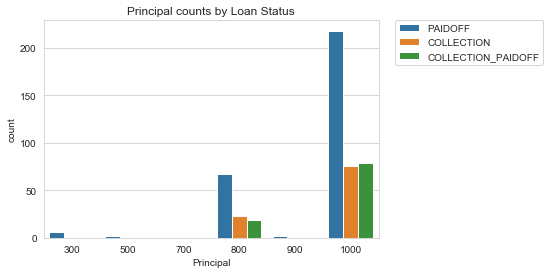

In [418]:
sns.countplot(x='Principal', hue='loan_status', data=loandf)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Principal counts by Loan Status')

Notice in the above plot: 

In this dataset of loan data, most people borrow $1000.

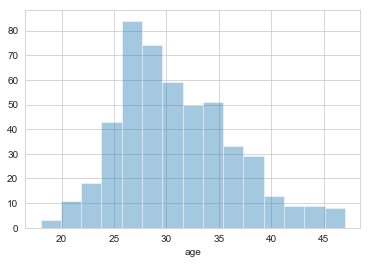

In [419]:
sns.distplot(loandf["age"], kde = False)

Notice in the above plot: 

Most of people who take out a loan are **25-35** years old.

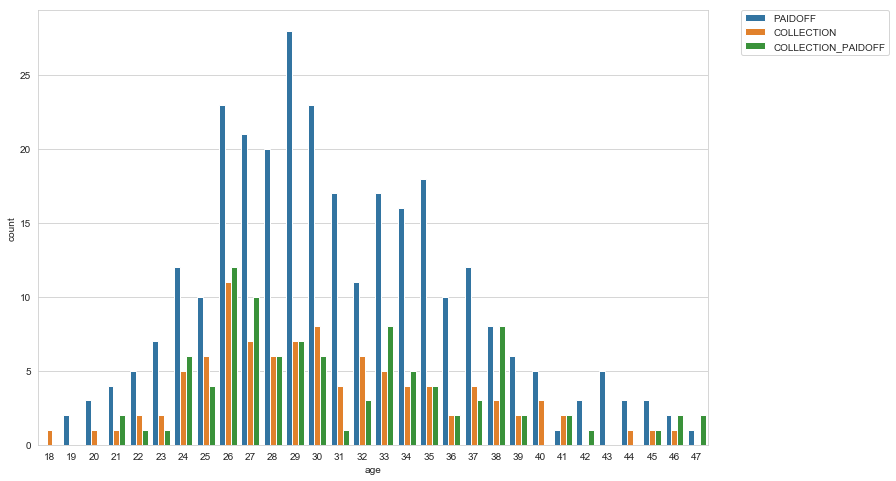

In [420]:
plt.figure(figsize=(12,8))
sns.countplot(x='age', hue='loan_status', data=loandf)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Notice in the above plot: 

Regardless of age, most people still manage to pay off their loans on time.

Text(0.5,1,'Education counts by Loan Status')

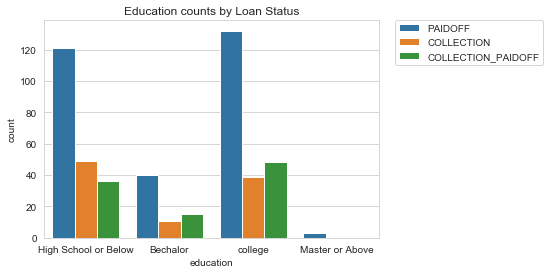

In [425]:
sns.countplot(x='education', hue='loan_status', data=loandf)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Education counts by Loan Status')

In [445]:
print("Number of people with a Bachelor's degree who pay off their loan: ", loandf[(loandf["education"] == "Bechalor") & 
       (loandf["loan_status"] == "PAIDOFF")].count()[1])

print("Number of people with a High School or Below degree who pay off their loan:", loandf[(loandf["education"] == "High School or Below") & 
       (loandf["loan_status"] == "PAIDOFF")].count()[1])

print("Number of people with a college degree who pay off their loan:", loandf[(loandf["education"] == "college") & 
       (loandf["loan_status"] == "PAIDOFF")].count()[1])

Number of people with a Bachelor's degree who pay off their loan:  40
Number of people with a High School or Below degree who pay off their loan: 121
Number of people with a college degree who pay off their loan: 132


In [446]:
print("Number of borrowers with a Bachelor's degree:", sum(loandf["education"] == "Bechalor") )
print("Number of borrowers with a High School or Below degree:", sum(loandf["education"] == "High School or Below"))
print("Number of borrowers with a college degree:", sum(loandf["education"] == "college"))

Number of borrowers with a Bachelor's degree: 66
Number of borrowers with a High School or Below degree: 206
Number of borrowers with a college degree: 219


In [447]:
print("Percentage of borrowers with a Bachelor's degree who pay off their loan:" ,round(40/66,2))
print("Percentage of borrowers with a High School or Below degree who pay off their loan:" ,round(121/206,2))
print("Percentage of borrowers with a college degree who pay off their loan:" ,round(132/219,2))

Percentage of borrowers with a Bachelor's degree who pay off their loan: 0.61
Percentage of borrowers with a High School or Below degree who pay off their loan: 0.59
Percentage of borrowers with a college degree who pay off their loan: 0.6


Notice in the above plot:

For each of the levels of education, about 60% of borrowers in the database repay their loan. So the likelihood of loan repayment doesn't seem to vary based on the education level of the borrowers.

Text(0.5,1,'Term counts by Loan Status')

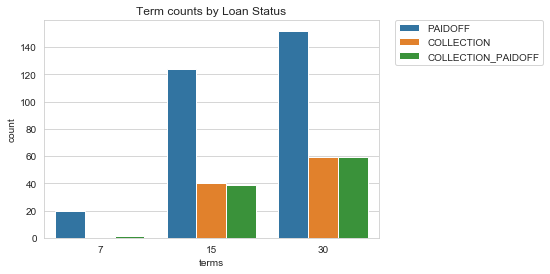

In [322]:
sns.countplot(x='terms', hue="loan_status", data=loandf)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Term counts by Loan Status')

In [478]:
print("Number of people who choose term 7 pay off their loan: ", loandf[(loandf["terms"] == 7) & 
       (loandf["loan_status"] == "PAIDOFF")].count()[1])

print("Number of people who choose term 15 pay off their loan:", loandf[(loandf["terms"] == 15) & 
       (loandf["loan_status"] == "PAIDOFF")].count()[1])

print("Number of people who choose term 30 pay off their loan:", loandf[(loandf["terms"] == 30) & 
       (loandf["loan_status"] == "PAIDOFF")].count()[1])

Number of people who choose term 7 pay off their loan:  20
Number of people who choose term 15 pay off their loan: 124
Number of people who choose term 30 pay off their loan: 152


In [476]:
print("Number of borrowers choose term 7:", sum(loandf["terms"] == 7) )
print("Number of borrowers choose term 15:", sum(loandf["terms"] == 15))
print("Number of borrowers choose term 30:", sum(loandf["terms"] == 30))

Number of borrowers choose term 7: 21
Number of borrowers choose term 15: 203
Number of borrowers choose term 30: 270


In [480]:
print("Percentage of borrowers who choose term 7 pay off their loan:" , round(20/21,2))
print("Percentage of borrowers who choose term 15 pay off their loan:" , round(124/203,2))
print("Percentage of borrowers who choose term 30 pay off their loan:" , round(152/270,2))

Percentage of borrowers who choose term 7 pay off their loan: 0.95
Percentage of borrowers who choose term 15 pay off their loan: 0.61
Percentage of borrowers who choose term 30 pay off their loan: 0.56


Notice in the above plot: 

In this dataset of loan data, in each term of loan, most people pay off on time. Moreover, people who choose term 7 have the highest pay off rate. It's because the sample size is too small. It's only 22 records and one person didnt pay off on time.

Text(0.5,1,'Gender counts by principal')

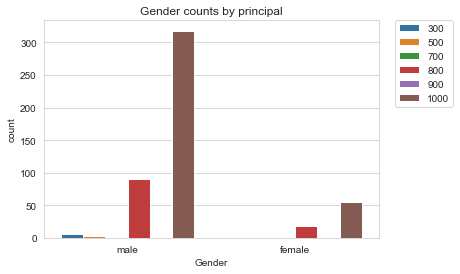

In [458]:
sns.countplot(x='Gender', hue="Principal", data=loandf)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Gender counts by principal')

Notice in the above plot: 

In the loan dataset, men take out for more $1000 loans than women.

Text(0.5,1,'Gender counts by principal')

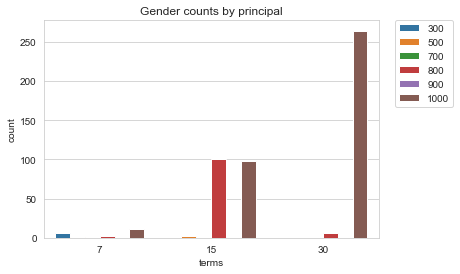

In [530]:
sns.countplot(x='terms', hue="Principal", data=loandf)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Gender counts by principal')

In [513]:
print("The maximum daily re-payment people manage to pay back when people choose term 7: ${}"
      .format(round(loandf[loandf["terms"] == 7]["Daily payment"].max(),2)))
print("The maximum daily re-payment people manage to pay back when people choose term 15: ${}"
      .format(round(loandf[loandf["terms"] == 15]["Daily payment"].max(),2)))
print("The maximum daily re-payment people manage to pay back when people choose term 30: ${}"
      .format(round(loandf[loandf["terms"] == 30]["Daily payment"].max(),2)))

The maximum daily re-payment people manage to pay back when people choose term 7: $142.86
The maximum daily re-payment people manage to pay back when people choose term 15: $66.67
The maximum daily re-payment people manage to pay back when people choose term 30: $33.33


In [529]:
print("The average daily re-payment people manage to pay back when people choose term 7: ${}"
      .format( round(loandf[loandf["terms"] == 7]["Daily payment"].mean(),2)))
print("The average daily re-payment people manage to pay back when people choose term 15: ${}"
      .format(round(loandf[loandf["terms"] == 15]["Daily payment"].mean(),2)))
print("The average daily re-payment people manage to pay back when people choose term 30: ${}"
      .format(round(loandf[loandf["terms"] == 30]["Daily payment"].mean(),2)))

The average daily re-payment people manage to pay back when people choose term 7: $107.48
The average daily re-payment people manage to pay back when people choose term 15: $59.57
The average daily re-payment people manage to pay back when people choose term 30: $33.19


Notice in the above plot:
    
It looks like columns terms and principal have high correlation.

**Testing correlation**

In [15]:
loandf.corr()

,Principal,terms,past_due_days,age
Principal,1.000000,0.534302,-0.093139,-0.092613
terms,0.534302,1.000000,-0.102613,-0.074259
past_due_days,-0.093139,-0.102613,1.000000,-0.053849
age,-0.092613,-0.074259,-0.053849,1.000000


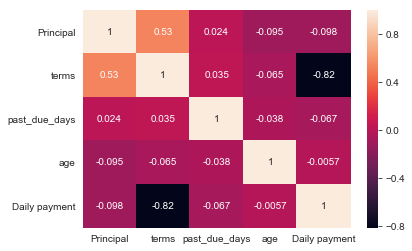

In [491]:
sns.heatmap(loandf.corr(), annot= True)

Notice in the above plot:

It looks like columns **terms** and **Principal** have some relationship.

## Analysis

* Do women tend to pay off their loans more reliably than men?

  A: Women pay off their loans more reliably than men.
  
___

* Do women tend to take out larger or smaller loans than men?
  
  A: In the loan dataset, men take out for more $1000 loans than women.
  
---

* Do older people tend to pay off their loans more reliably?
  
  A: **Younger people** pay off their loans more reliably than older people.
___

* Do people have higher education tend to pay off their loans more reliably?

  A: For each of the levels of education, about 60% of borrowers in the database repay their loan. So the likelihood of loan repayment doesn't seem to vary based on the education level of the borrowers.
___

* What is the term of loan people usually choose?

  A: People choose monthly pay off schedule more than others.
___

* Do higher education people borrow more? 
  
  A: Those with a **master’s degree or higher** have less of a tendency to take out a loan than those with a lesser degree of education.
___

* Which age range borrows more? 

  A: Most of people who take out a loan are **25-35 years old**.
___

* Of the loans that people usually pay off, what are the terms of those loans?

  A: In this dataset of loan data, in each term of loan, most people pay loan off on time. However, people who choose term **7** have the **highest pay off rate**. It's because the sample size is too small. **It's only 22 records and one person didnt pay off on time**.
___

* What is the maximum daily re-payment people manage to pay back?

  A: The maximum daily re-payment people manage to pay back when people choose term **7**: $142.86. 
  
  A: The maximum daily re-payment people manage to pay back when people choose term **15**: $66.67. 
  
  A: The maximum daily re-payment people manage to pay back when people choose term **30**: $33.33
___

* What is the average daily re-payment people manage to pay back?

  A: The average daily re-payment people manage to pay back when people choose term **7**: $107.48. 
  
  A: The average daily re-payment people manage to pay back when people choose term **15**: $59.57. 
  
  A: The average daily re-payment people manage to pay back when people choose term **30**: $33.19
___

* Based on the previous 2 analysis, borrowers tend to borrow more money when they choose **term 7**. In other words, they have more burden. We also can see from the above analysis that even though choose **term 7** and the **average** daily re-payment slightly lower than **maximum** daily re-payment, borrowers still need to pay daily re-payment more than other terms. It indicates that most people still choose higher principal when they also choose term 7.
___

* One of an interesting things is that the percentage of borrowers with whatever degree who pay off their loan are about the same. In other words, the likelihood of loan repayment doesn't seem to vary based on the education level of the borrowers. Before I really dig into the data, I thought higher education people would have higher percentage pay off rate.  


## Predictive analytics

**Choose _4 different classifiers_ to make the models and based on the accuracy to choose the best one.**

In [573]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.cross_validation import cross_val_score

In [594]:
X = loandf_copy.drop(['loan_status'], axis=1)
y = loandf_copy['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**In a real-life model, we split dataset into two: _cross-validation_ and _test datasets_   (hold-out test dataset). Reserve 30% of the dataset for final performance testing.**

In [595]:
import warnings
warnings.filterwarnings("ignore")

max_depths = np.arange(1, X.shape[1] + 1)


param_grid1 = {'max_depth': max_depths,'max_features': max_depths}
param_grid2 = {'max_depth': max_depths,'max_features': max_depths}
param_grid3 = {"n_neighbors" : max_depths}


param_grids = [param_grid1, param_grid2, param_grid3]
models = [DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier]

for model, param in zip(models, param_grids):

    grid = GridSearchCV(model(), param, cv = 10, scoring= "accuracy")
    grid.fit(X_train, y_train)
    
    print(model.__name__, grid.best_params_, round(grid.best_score_,5))

DecisionTreeClassifier {'max_depth': 1, 'max_features': 1} 0.57681
RandomForestClassifier {'max_depth': 4, 'max_features': 3} 0.57971
KNeighborsClassifier {'n_neighbors': 2} 0.51304


In [597]:
acc_of_model = cross_val_score(LogisticRegression(), X_train, y_train, cv=10, scoring='accuracy').mean()

print("Accuracy for LogisticRegression is", round(acc_of_model,5))  

Accuracy for LogisticRegression is 0.577


For DecisionTreeClassifier, I choose parameters **max_depth** and **max_features**.

For RandomForestClassifier, I choose parameters **max_depth** and **max_features**.

For KNeighborsClassifier, I choose parameter **n_neighbors**.

---

After I run the models above, **RandomForestClassifier** gives the slightly higher accuracy than other models. I would use RandomForestClassifier model in this dataset.

**Refit the model with the best score using the parameters found on the whole CV dataset and measure the performance on the hold-out test dataset.**

In [581]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_depth = 2, max_features = 3)
rf.fit(X_train, y_train)
rf_pred_test = rf.predict(X_test)

print("The accuracy:", round(accuracy_score(y_test, rf_pred_test),2))

The accuracy: 0.65


In the previous stage, we fit the CV dataset in the model and we get the accuracy 58%. Now, we predict the testing dataset and get the accuracy 65%. Generally, the accuracy should be slightly lower after we predict the testing set since the test dataset (hold out test dataset) is the new dataset that the model have never seen before. In our case, the accuracy is not significantly higher so it should be fine.

**Predict a person who is going to pay off the loan or not: Principal=800, terms=15, age=30, male=0, High School or Below=1, Master or Above=0, college=0.**

In [586]:
new_data = np.array([800, 15, 30, 0, 1, 0, 0]).reshape((1,7))

print("Prediction:", rf.predict(new_data))

Prediction: [0]


Notice in the above predictve model:

The output shows that this person is going to pay off his/her loan based on the data he/she gives us.